In [1]:
import ROOT as r
import cmsstyle as CMS
import numpy as np

Warning in <TInterpreter::ReadRootmapFile>: class  edm::Wrapper<std::vector<bool> > found in libDataFormatsWrappedStdDictionaries.so  is already in libOSUT3AnalysisAnaTools.so 
Warning in <TInterpreter::ReadRootmapFile>: class  edm::Wrapper<vector<bool> > found in libDataFormatsWrappedStdDictionaries.so  is already in libOSUT3AnalysisAnaTools.so 


Welcome to JupyROOT 6.26/11


In [7]:
def addPlots(files, plotName, scale=None):
    for i, f in enumerate(files):
        if i == 0:
            h = f.Get(plotName).Clone()
            h.SetDirectory(0)
            test = h.GetBinContent(1)
            if test-round(test) == 0:
                print(f'index {i} may not be scaled')
                print(test, round(test))
        else:
            h_tmp = f.Get(plotName)
            test = h_tmp.GetBinContent(1)
            if test - round(test) ==0:
                print(f'index {i} may not be scaled')
                print(test, round(test))

            h.Add(f.Get(plotName))
        f.Close()

    if scale:
        h.Scale(scale/h.GetBinContent(1))
    h.Sumw2()
    
    return h

Combining Z->ll plots
index 3 may not be scaled
0.0 0
Combining TT plots
Combining QCD plots
index 0 may not be scaled
0.0 0
index 1 may not be scaled
0.0 0
index 2 may not be scaled
0.0 0
Combining single t plots
Combining diboson plots
Combining Z->nunu plots
index 3 may not be scaled
0.0 0


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hist1d_root
Info in <TCanvas::Print>: pdf file test.pdf has been created


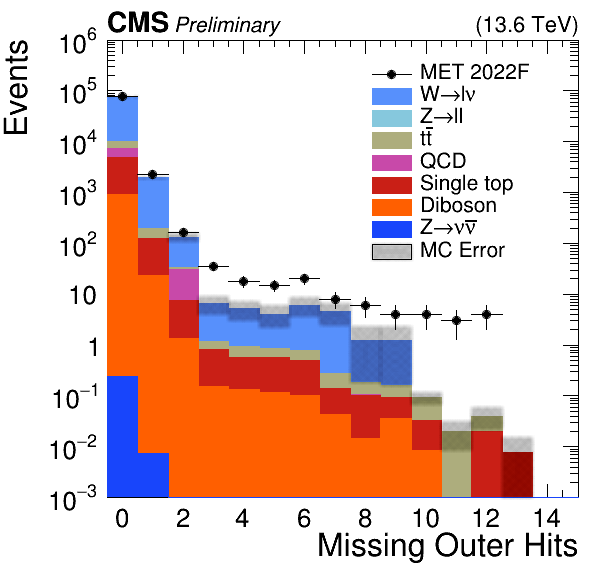

In [158]:
# File reading 

r.gStyle.SetHatchesLineWidth=0.1
r.gStyle.SetHatchesLineSpacing=1

#plotName = 'MuonCtrlSelectionPlotter/Track Plots/trackNHitsMissingOuter'
plotName = 'HitsSystematicsCtrlSelectionPlotter/Track Plots/trackNHitsMissingOuter'

signal = r.TFile.Open('/data/users/mcarrigan/condor/MET_2022/MET_2022F_MissingHitsCorrection/MET_2022F.root')
h_signal = signal.Get(plotName)
firstBin = h_signal.GetBinContent(1)

wlnu = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/WToLNu_4Jets_2022EE/WToLNu_4Jets_2022EE_2022F.root')
h_wlnu = addPlots([wlnu], plotName)

zll100 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT100to200_2022EE/Zto2Nu_4Jets_HT100to200_2022EE_2022F.root')
zll200 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT200to400_2022EE/Zto2Nu_4Jets_HT200to400_2022EE_2022F.root')
zll400 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT400to800_2022EE/Zto2Nu_4Jets_HT400to800_2022EE_2022F.root')
zll800 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT800to1500_2022EE/Zto2Nu_4Jets_HT800to1500_2022EE_2022F.root')
zll1500 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT1500to2500_2022EE/Zto2Nu_4Jets_HT1500to2500_2022EE_2022F.root')
zll2500 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT2500_2022EE/Zto2Nu_4Jets_HT2500_2022EE_2022F.root')

zll = [zll100, zll200, zll400, zll800, zll1500, zll2500]
print("Combining Z->ll plots")
h_zll = addPlots(zll, plotName)


ttb_l = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TTto2L2Nu_2022EE/TTto2L2Nu_2022EE_2022F.root')
ttb_q = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TTto4Q_2022EE/TTto4Q_2022EE_2022F.root')
ttb = [ttb_l, ttb_q]
print("Combining TT plots")
h_ttb = addPlots(ttb, plotName)

qcd15 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT15to30_2022EE/QCD_PT15to30_2022EE_2022F.root')
qcd30 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT30to50_2022EE/QCD_PT30to50_2022EE_2022F.root')
qcd50 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT50to80_2022EE/QCD_PT50to80_2022EE_2022F.root')
qcd80 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT80to120_2022EE/QCD_PT80to120_2022EE_2022F.root')
qcd120 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT120to170_2022EE/QCD_PT120to170_2022EE_2022F.root')
qcd170 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT170to300_2022EE/QCD_PT170to300_2022EE_2022F.root')
qcd300 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT300to470_2022EE/QCD_PT300to470_2022EE_2022F.root')
qcd470 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT470to600_2022EE/QCD_PT470to600_2022EE_2022F.root')
qcd600 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT600to800_2022EE/QCD_PT600to800_2022EE_2022F.root')
qcd800 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT800to1000_2022EE/QCD_PT800to1000_2022EE_2022F.root')
qcd1000 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT1000to1400_2022EE/QCD_PT1000to1400_2022EE_2022F.root')
qcd1400 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT1400to1800_2022EE/QCD_PT1400to1800_2022EE_2022F.root')
qcd1800 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT1800to2400_2022EE/QCD_PT1800to2400_2022EE_2022F.root')
qcd2400 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT2400to3200_2022EE/QCD_PT2400to3200_2022EE_2022F.root')
qcd3200 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT3200_2022EE/QCD_PT3200_2022EE_2022F.root')
qcd = [qcd15, qcd30, qcd50, qcd80, qcd120, qcd170, qcd300, qcd470, qcd600, qcd800, qcd1000, qcd1400, qcd1800, qcd2400, qcd3200]
print("Combining QCD plots")
h_qcd = addPlots(qcd, plotName)

tbarB = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TbarBtoLminusNuB_2022EE/TbarBtoLminusNuB_2022EE_2022F.root')
tBbar = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TBbartoLplusNuBbar_2022EE/TBbartoLplusNuBbar_2022EE_2022F.root')
tbarQ = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TbarQtoLNu_2022EE/TbarQtoLNu_2022EE_2022F.root')
tqBar = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TQbartoLNu_2022EE/TQbartoLNu_2022EE_2022F.root')
tbarW2L = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TbarWplusto2L2Nu_2022EE/TbarWplusto2L2Nu_2022EE_2022F.root')
tbarWL = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TbarWplustoLNu2Q_2022EE/TbarWplustoLNu2Q_2022EE_2022F.root')
tW2L = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TWminusto2L2Nu_2022EE/TWminusto2L2Nu_2022EE_2022F.root')
tWL = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TWminustoLNu2Q_2022EE/TWminustoLNu2Q_2022EE_2022F.root')
singleT = [tbarB, tBbar, tbarQ, tqBar, tbarW2L, tbarWL, tW2L, tWL]
print("Combining single t plots")
h_t = addPlots(singleT, plotName)

ww = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/WW_2022EE/WW_2022EE_2022F.root')
wz = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/WZ_2022EE/WZ_2022EE_2022F.root')
zz = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/ZZ_2022EE/ZZ_2022EE_2022F.root')
diboson = [ww, wz, zz]
print("Combining diboson plots")
h_diboson = addPlots(diboson, plotName)

znu100 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT100to200_2022EE/Zto2Nu_4Jets_HT100to200_2022EE_2022F.root')
znu200 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT200to400_2022EE/Zto2Nu_4Jets_HT200to400_2022EE_2022F.root')
znu400 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT400to800_2022EE/Zto2Nu_4Jets_HT400to800_2022EE_2022F.root')
znu800 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT800to1500_2022EE/Zto2Nu_4Jets_HT800to1500_2022EE_2022F.root')
znu1500 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT1500to2500_2022EE/Zto2Nu_4Jets_HT1500to2500_2022EE_2022F.root')
znu2500 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT2500_2022EE/Zto2Nu_4Jets_HT2500_2022EE_2022F.root')
znu = [znu100, znu200, znu400, znu800, znu1500, znu2500]
print("Combining Z->nunu plots")
h_znu = addPlots(znu, plotName)

th1_names = ['Z#rightarrow#nu#bar{#nu}', 'Diboson', 'Single top', 'QCD', 't#bar{t}', 'Z#rightarrowll', 'W#rightarrowl#nu']

th1s = [h_znu, h_diboson, h_t, h_qcd, h_ttb, h_zll, h_wlnu]

totalCount = np.zeros(th1s[0].GetNbinsX())
for h in th1s:
    for b in range(h.GetNbinsX()):
        totalCount[b] += h.GetBinContent(b+1)

for h in th1s:
    h.Scale(firstBin/totalCount[0])

errors = np.sqrt(totalCount)

# Styling
CMS.SetExtraText("Preliminary")
iPos = 0
canv_name = 'hist1d_root'
CMS.SetLumi("")
CMS.SetEnergy("13.6")
CMS.ResetAdditionalInfo()


# Plotting
stack = r.THStack("stack", "Stacked")
canv = CMS.cmsCanvas(canv_name,-0.5,15,1e-3,1e6,"Missing Outer Hits","Events",square=CMS.kSquare,extraSpace=0.05,iPos=iPos)

leg = CMS.cmsLeg(0.61, 0.89 - 0.05 * 7, 0.99, 0.89, textSize=0.04)
leg.AddEntry(h_signal, 'MET 2022F', 'lp')

# Put samples in a dict {sample: th1} and draw
hist_dict = dict(zip([name.split("_")[-1] for name in th1_names], th1s))
CMS.cmsDrawStack(stack, leg, hist_dict)
CMS.GetcmsCanvasHist(canv).GetYaxis().SetTitleOffset(1.6)
CMS.cmsDraw(h_signal, "P", mcolor=r.kBlack)

canv.Draw()
canv.SetLogy()

for i, h in enumerate(th1s):
    if i==0:
        hTotal = h
    else:
        hTotal.Add(h)

n = th1s[0].GetNbinsX()+1

# Create the graph with asymmetric errors
graph = r.TGraphAsymmErrors(hTotal)

# Style the graph
graph.SetTitle("Box Plot with Errors;X-axis;Y-axis")
# Set cross-hatched style for errors

# Draw the error band on the canvas
CMS.cmsDraw(graph, "E2", lwidth=1, fstyle=3944, fcolor=r.kBlack, alpha=0.01)
leg.AddEntry(graph, 'MC Error', 'f')

# Draw the stack again to ensure proper layering
# Draw the graph
#CMS.cmsDraw(graph, 'e2 same')  # "A2P" draws shaded areas and points

canv.SaveAs("test.pdf")

Combining Z->ll plots
index 3 may not be scaled
0.0 0
Combining TT plots
Combining QCD plots
index 0 may not be scaled
0.0 0
index 1 may not be scaled
0.0 0
index 2 may not be scaled
0.0 0
Combining single t plots
Combining diboson plots
Combining Z->nunu plots
index 3 may not be scaled
0.0 0


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hist1d_root
Info in <TCanvas::Print>: pdf file test.pdf has been created


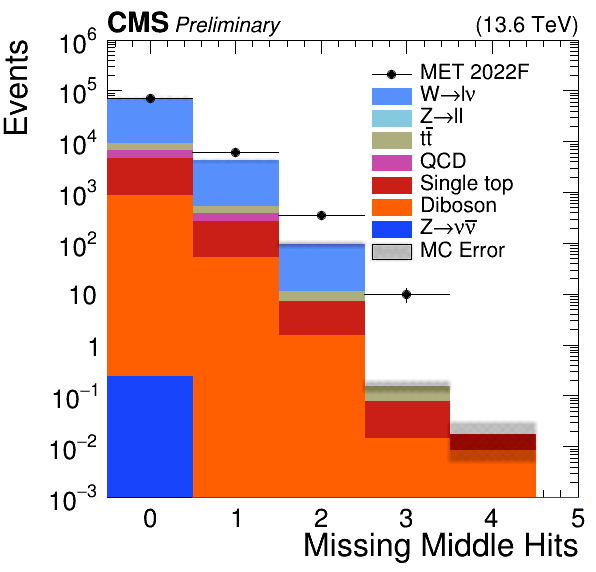

In [157]:
# File reading 

r.gStyle.SetHatchesLineWidth=0.1
r.gStyle.SetHatchesLineSpacing=1

#plotName = 'MuonCtrlSelectionPlotter/Track Plots/trackNHitsMissingOuter'
plotName = 'HitsSystematicsCtrlSelectionPlotter/Track Plots/trackNHitsMissingMiddle'

signal = r.TFile.Open('/data/users/mcarrigan/condor/MET_2022/MET_2022F_MissingHitsCorrection/MET_2022F.root')
h_signal = signal.Get(plotName)
firstBin = h_signal.GetBinContent(1)

wlnu = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/WToLNu_4Jets_2022EE/WToLNu_4Jets_2022EE_2022F.root')
h_wlnu = addPlots([wlnu], plotName)

zll100 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT100to200_2022EE/Zto2Nu_4Jets_HT100to200_2022EE_2022F.root')
zll200 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT200to400_2022EE/Zto2Nu_4Jets_HT200to400_2022EE_2022F.root')
zll400 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT400to800_2022EE/Zto2Nu_4Jets_HT400to800_2022EE_2022F.root')
zll800 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT800to1500_2022EE/Zto2Nu_4Jets_HT800to1500_2022EE_2022F.root')
zll1500 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT1500to2500_2022EE/Zto2Nu_4Jets_HT1500to2500_2022EE_2022F.root')
zll2500 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT2500_2022EE/Zto2Nu_4Jets_HT2500_2022EE_2022F.root')

zll = [zll100, zll200, zll400, zll800, zll1500, zll2500]
print("Combining Z->ll plots")
h_zll = addPlots(zll, plotName)


ttb_l = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TTto2L2Nu_2022EE/TTto2L2Nu_2022EE_2022F.root')
ttb_q = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TTto4Q_2022EE/TTto4Q_2022EE_2022F.root')
ttb = [ttb_l, ttb_q]
print("Combining TT plots")
h_ttb = addPlots(ttb, plotName)

qcd15 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT15to30_2022EE/QCD_PT15to30_2022EE_2022F.root')
qcd30 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT30to50_2022EE/QCD_PT30to50_2022EE_2022F.root')
qcd50 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT50to80_2022EE/QCD_PT50to80_2022EE_2022F.root')
qcd80 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT80to120_2022EE/QCD_PT80to120_2022EE_2022F.root')
qcd120 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT120to170_2022EE/QCD_PT120to170_2022EE_2022F.root')
qcd170 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT170to300_2022EE/QCD_PT170to300_2022EE_2022F.root')
qcd300 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT300to470_2022EE/QCD_PT300to470_2022EE_2022F.root')
qcd470 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT470to600_2022EE/QCD_PT470to600_2022EE_2022F.root')
qcd600 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT600to800_2022EE/QCD_PT600to800_2022EE_2022F.root')
qcd800 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT800to1000_2022EE/QCD_PT800to1000_2022EE_2022F.root')
qcd1000 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT1000to1400_2022EE/QCD_PT1000to1400_2022EE_2022F.root')
qcd1400 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT1400to1800_2022EE/QCD_PT1400to1800_2022EE_2022F.root')
qcd1800 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT1800to2400_2022EE/QCD_PT1800to2400_2022EE_2022F.root')
qcd2400 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT2400to3200_2022EE/QCD_PT2400to3200_2022EE_2022F.root')
qcd3200 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/QCD_PT3200_2022EE/QCD_PT3200_2022EE_2022F.root')
qcd = [qcd15, qcd30, qcd50, qcd80, qcd120, qcd170, qcd300, qcd470, qcd600, qcd800, qcd1000, qcd1400, qcd1800, qcd2400, qcd3200]
print("Combining QCD plots")
h_qcd = addPlots(qcd, plotName)

tbarB = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TbarBtoLminusNuB_2022EE/TbarBtoLminusNuB_2022EE_2022F.root')
tBbar = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TBbartoLplusNuBbar_2022EE/TBbartoLplusNuBbar_2022EE_2022F.root')
tbarQ = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TbarQtoLNu_2022EE/TbarQtoLNu_2022EE_2022F.root')
tqBar = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TQbartoLNu_2022EE/TQbartoLNu_2022EE_2022F.root')
tbarW2L = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TbarWplusto2L2Nu_2022EE/TbarWplusto2L2Nu_2022EE_2022F.root')
tbarWL = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TbarWplustoLNu2Q_2022EE/TbarWplustoLNu2Q_2022EE_2022F.root')
tW2L = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TWminusto2L2Nu_2022EE/TWminusto2L2Nu_2022EE_2022F.root')
tWL = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/TWminustoLNu2Q_2022EE/TWminustoLNu2Q_2022EE_2022F.root')
singleT = [tbarB, tBbar, tbarQ, tqBar, tbarW2L, tbarWL, tW2L, tWL]
print("Combining single t plots")
h_t = addPlots(singleT, plotName)

ww = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/WW_2022EE/WW_2022EE_2022F.root')
wz = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/WZ_2022EE/WZ_2022EE_2022F.root')
zz = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/ZZ_2022EE/ZZ_2022EE_2022F.root')
diboson = [ww, wz, zz]
print("Combining diboson plots")
h_diboson = addPlots(diboson, plotName)

znu100 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT100to200_2022EE/Zto2Nu_4Jets_HT100to200_2022EE_2022F.root')
znu200 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT200to400_2022EE/Zto2Nu_4Jets_HT200to400_2022EE_2022F.root')
znu400 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT400to800_2022EE/Zto2Nu_4Jets_HT400to800_2022EE_2022F.root')
znu800 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT800to1500_2022EE/Zto2Nu_4Jets_HT800to1500_2022EE_2022F.root')
znu1500 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT1500to2500_2022EE/Zto2Nu_4Jets_HT1500to2500_2022EE_2022F.root')
znu2500 = r.TFile.Open('/abyss/users/mcarrigan/MissingHitsCorrections/Zto2Nu_4Jets_HT2500_2022EE/Zto2Nu_4Jets_HT2500_2022EE_2022F.root')
znu = [znu100, znu200, znu400, znu800, znu1500, znu2500]
print("Combining Z->nunu plots")
h_znu = addPlots(znu, plotName)

th1_names = ['Z#rightarrow#nu#bar{#nu}', 'Diboson', 'Single top', 'QCD', 't#bar{t}', 'Z#rightarrowll', 'W#rightarrowl#nu']

th1s = [h_znu, h_diboson, h_t, h_qcd, h_ttb, h_zll, h_wlnu]

totalCount = np.zeros(th1s[0].GetNbinsX())
for h in th1s:
    for b in range(h.GetNbinsX()):
        totalCount[b] += h.GetBinContent(b+1)

for h in th1s:
    h.Scale(firstBin/totalCount[0])

errors = np.sqrt(totalCount)

# Styling
CMS.SetExtraText("Preliminary")
iPos = 0
canv_name = 'hist1d_root'
CMS.SetLumi("")
CMS.SetEnergy("13.6")
CMS.ResetAdditionalInfo()


# Plotting
stack = r.THStack("stack", "Stacked")
canv = CMS.cmsCanvas(canv_name,-0.5,5,1e-3,1e6,"Missing Middle Hits","Events",square=CMS.kSquare,extraSpace=0.05,iPos=iPos)

leg = CMS.cmsLeg(0.61, 0.89 - 0.05 * 7, 0.99, 0.89, textSize=0.04)
leg.AddEntry(h_signal, 'MET 2022F', 'lp')

# Put samples in a dict {sample: th1} and draw
hist_dict = dict(zip([name.split("_")[-1] for name in th1_names], th1s))
CMS.cmsDrawStack(stack, leg, hist_dict)
CMS.GetcmsCanvasHist(canv).GetYaxis().SetTitleOffset(1.6)
CMS.cmsDraw(h_signal, "P", mcolor=r.kBlack)

canv.Draw()
canv.SetLogy()

for i, h in enumerate(th1s):
    if i==0:
        hTotal = h
    else:
        hTotal.Add(h)

n = th1s[0].GetNbinsX()+1

# Create the graph with asymmetric errors
graph = r.TGraphAsymmErrors(hTotal)

# Style the graph
graph.SetTitle("Box Plot with Errors;X-axis;Y-axis")
# Set cross-hatched style for errors

# Draw the error band on the canvas
CMS.cmsDraw(graph, "E2", lwidth=1, fstyle=3944, fcolor=r.kBlack, alpha=0.01)
leg.AddEntry(graph, 'MC Error', 'f')

# Draw the stack again to ensure proper layering
# Draw the graph
#CMS.cmsDraw(graph, 'e2 same')  # "A2P" draws shaded areas and points

canv.SaveAs("test.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


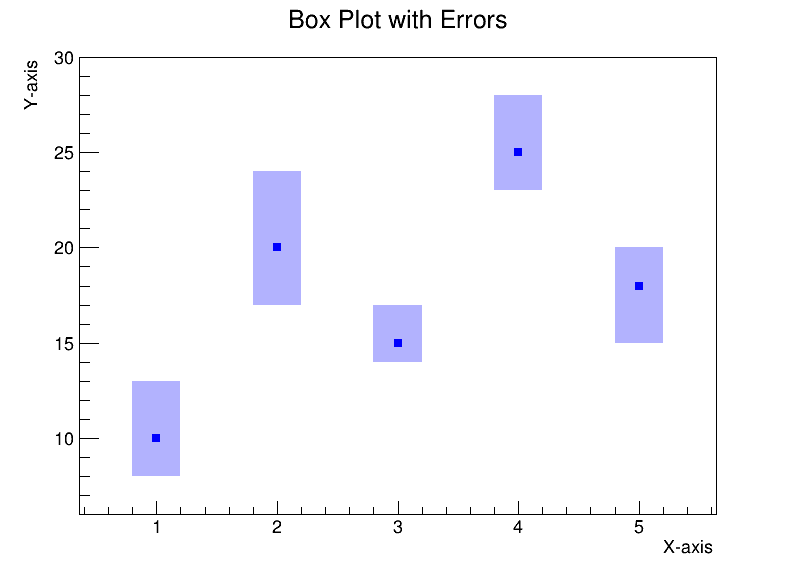

In [5]:
c1 = r.TCanvas("c1", "c1", 800, 600)
c1.cd()
n = 5
x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 25, 18]
x_err_low = [0.2, 0.2, 0.2, 0.2, 0.2]  # X lower uncertainties
x_err_high = [0.2, 0.2, 0.2, 0.2, 0.2]  # X upper uncertainties
y_err_low = [2, 3, 1, 2, 3]             # Y lower uncertainties
y_err_high = [3, 4, 2, 3, 2]            # Y upper uncertainties

# Create the graph with asymmetric errors
graph = r.TGraphAsymmErrors(n)
for i in range(n):
    graph.SetPoint(i, x[i], y[i])
    graph.SetPointError(i, x_err_low[i], x_err_high[i], y_err_low[i], y_err_high[i])

# Style the graph
graph.SetFillColorAlpha(r.kBlue, 0.3)  # Semi-transparent blue fill
graph.SetLineColor(r.kBlue)
graph.SetMarkerStyle(21)
graph.SetMarkerColor(r.kBlue)
graph.SetTitle("Box Plot with Errors;X-axis;Y-axis")

# Draw the graph
graph.Draw("A2P")
c1.Draw()